# Exercise 7: the dehydration of ethanol
Date: Wednesday 5 April 2023

**Submission deadline**: Sunday 16 April 2023

In this exercise we will investigate a very important chemical reaction, namely the production of ethene (ethylene) from ethanol. Ethanol is heated with an excess of concentrated sulphuric acid at a temperature of 170°C. The gases produced are passed through sodium hydroxide solution to remove the carbon dioxide and sulphur dioxide produced from side reactions. Another way to favor this reaction is in presence of a catalyst surface, which makes the reaction exothermic even at room temperature, and the free energy barrier for the reaction is highly reduced, so to obtain reasonable reaction rates. The use of hematite (an iron-based nanocrystal) as a catalyst is described computationally in [this paper (clickable link)](https://pubs.rsc.org/en/content/articlelanding/2016/RA/C6RA08509A#!divAbstract) by Lopes *et. al.*. We are interested in the gas phase reaction, in particular in the reactants and the products energy, to estimate the “energy of reaction”.

The reaction is the following:

\begin{equation}
    \text{CH}_3\text{CH}_2\text{OH} \longrightarrow \text{C}_2\text{H}_4 + \text{H}_2\text{O}
\end{equation}

and, in the gas phase, the equation looks like

![The dehydration of **(a)** ethanol after overcoming a **(b) transition state (TS)** into its **(c)** products: ethene and water.](ethanol.png "Figure 1")

In the supplementary material of the paper, which can be found [here](http://www.rsc.org/suppdata/c6/ra/c6ra08509a/c6ra08509a1.pdf), several calculations with different methods ranging from DFT to hybrid methods to even higher-level methods are described, together with the basis set dependence of the results. We will compare our results with those published by performing calculations within the DFT framework for two different functionals: the PBE parametrization of the generalized gradient approximation (GGA), introduced in Exercise 7, and the hybrid functional B3LYP (named after those who developed it: Becke, 3-parameter, Lee–Yang–Parr); within each functional we will optimize the geometry at two-three basis sets per functional, thereby obtaining a final (hopefully converged!) value for the total inner energy $U$. From here we will use thermodynamics to relate $U$ to the Gibbs free energy $G$; see the Figure below:

<img src="rxn-coord.png" alt="isolated" width="700"/>

# 0. Calculations with PBE

We begin by logging into our accounts on JupyterHub on Euler in a similar manner as described in the previous exercises, and `pull` the newest exercise files from the GitHub repository, making sure that you are in the directory for the course:
```bash
    $ cd ~/Molecular-and-Materials-Modelling-FS2023
    $ git init
  # $ git stash
    $ git pull https://github.com/ramador09/Molecular-and-Materials-Modelling-FS2023.git
```  

As mentioned earlier, we will be running calculations using two different functionals PBE and B3LYP, and each functional shall be run using different basis sets. We want to organize our calculations in a meaningful way. Within the `exercise-7-files` directory, make a directory for PBE:

```bash
$ mkdir PBE
```

In the current `exercise-7-files` directory you will find the following eight files:

* `H2O\_template.inp}` for the optimization of water and the corresponding `H2O.xyz` file providing the geometry;
* `ethanol\_template.inp` for the optimization of ethanol and the corresponding `ethanol.xyz` file providing the geometry;
* `ethylene\_template.inp` for the geometry optimization of ethylene and the corresponding `ethylene.xyz` file providing the geometry;
* `ts\_template.inp` for the transition state and the corresponding `ts.xyz` file providing the geometry`

Move into the `PBE` directory and make a new subdirectory `SZV`, the name of the first (and simplest) basis sets we will examine today, and move into the `SZV` directory:

```bash
$ cd PBE
$ mkdir SZV
$ cd SZV
```

Copy the `H2O_template.inp` file from the parent directory into the current one and rename it:

```bash
$ cp ../../H2O_template.inp .
$ mv H2O_template.inp H2O.inp
```

Submit the calculation on H2O in the current directory, either using a submit script from a previous week

```
#!/bin/bash

#SBATCH -N 2
#SBATCH -n 16
#SBATCH --time=4:00:00
#SBATCH --job-name="nice name"
#SBATCH --mem-per-cpu=1024
#SBATCH --output=stdout.txt
#SBATCH --error=stderr.txt

# module load openmpi/4.0.2
# module load gcc/6.3.0 openmpi/4.0.2 cp2k/8.2
/cluster/scratch/danielep/cp2k.ssmp -i input.inp > output.out
```

or by simply using the command line

```bash
/cluster/scratch/danielep/cp2k.ssmp -i input.inp > output.out
```

For the `H2O`, `ethanol`, and `ethene` projects, notice how the `RUN_TYPE` keyword in the `&GLOBAL` section of the input file is associated with `GEO_OPT`. This means (unsurprisingly) that we will be optimizing the geometry, as we've done in previous exercises. While the calculation is running, open a new Terminal in your launcher and visualize the the `H2O.inp` file with vim.

The structure and layout of the input files for `ethanol` and `ethene` are similar. Now, however, we open the input file for the **transition state** `ts.inp` and notice the change in the `&GLOBAL` section:

```
&GLOBAL
  PROJECT ts
  RUN_TYPE ENERGY
  PRINT_LEVEL LOW
&END GLOBAL
```

The `ENERGY` value associated to the `RUN_TYPE` keyword indicates that we are merely calculating the energy of the configuration and **explicitly not** optimizing the geometry --- indeed this is the case, since the geometry of the transition state is simply being provided (transition state theory is a whole Pandora's box...).

Execute the following cells and proceed to the first assignment.

In [1]:
import numpy as np
from ase.io import read
from ase.io.trajectory import Trajectory
from ase.visualize import view
from ase.build import fcc111,add_adsorbate,molecule
import matplotlib.pyplot as plt
import nglview as nv

In [2]:
def view_structure(system):
    t = nv.ASEStructure(system) 
    w = nv.NGLWidget(t, gui=True)
    w.add_spacefill()
    return w

In [3]:
def view_trajectory(trajectory):
    t2 = nv.ASETrajectory(trajectory)
    w2 = nv.NGLWidget(t2, gui=True)
    w2.add_spacefill()
    return w2;

## 1. Calculations with PBE

#### Assignment 1:The remaining simulations for the SVZ basis set
Repeat and submit the remaining calculations for `ethanol.inp`, `ethene.inp`, and `ts.inp` for the PBE.

In [1]:
## -- Your code here
!cp H2O_template.inp B3LYP/SZV/H2O.inp
!cp ethanol_template.inp B3LYP/SZV/ethanol.inp
!cp ethene_template.inp B3LYP/SZV/ethene.inp
!cp ts_template.inp B3LYP/SZV/ts.inp

!cp H2O.xyz B3LYP/SZV
!cp ethanol.xyz B3LYP/SZV
!cp ethene.xyz B3LYP/SZV
!cp ts.xyz B3LYP/SZV

In [ ]:
!cd PBE/SZV
!/cluster/scratch/danielep/cp2k.ssmp -i ethanol.inp > ethanol.out
!/cluster/scratch/danielep/cp2k.ssmp -i ethene.inp > ethene.out
!/cluster/scratch/danielep/cp2k.ssmp -i ts.inp > ts.out

#### End Assignment 1

#### Assignment 2: Visualization of the structures trajectories, and orbitals
Visualize the structures and trajectories of the reactant ethanol as well as of the products ethene and water. Remember that the trajectory will have been generated as an output file in the following nominal format: `project_name-pos-1.xyz`.

The three geometry optimizations produce one `.cube` file every step, and they are named according to `project_name-WFN_orbital_number_1-1-_step_number.cube`; use code from exercise 6 to visualize the HOMO and LUMO orbitals of the optimized geometries of all three molecules.

In [4]:
molecules = ["H2O", "ethanol", "ethene", "ts"]

In [5]:
structures = [f"PBE/SZV/{n}-pos-1.xyz" for n in molecules[:-1]]

H2O = read(structures[0])
ethanol = read(structures[1])
ethene = read(structures[2])

H2O_traj = read(structures[0], index=":")
ethanol_traj = read(structures[1], index=":")
ethene_traj = read(structures[2], index=":")

In [6]:
view_structure(H2O)

NGLWidget()

In [7]:
view_structure(ethanol)

NGLWidget()

In [8]:
view_structure(ethene)

NGLWidget()

In [9]:
view_trajectory(H2O_traj)

NGLWidget(max_frame=10)

In [10]:
view_trajectory(ethanol_traj)

NGLWidget(max_frame=5)

In [11]:
view_trajectory(ethene_traj)

NGLWidget(max_frame=4)

In [12]:
import pandas as pd

In [22]:
## -- Your code here
def plot_wave_func(df, kind, orbital):
    df = df.sort_values("orbital")
    occupied = df.loc[df["orbital"].str.contains("HOMO")]
    unoccupied = df.loc[df["orbital"].str.contains("LUMO")]

    if kind == "HOMO":
        #rows = occupied.loc[occupied["orbital"].str.contains(f"{orbital}")]
        #row = occupied.iloc[orbital, :]
        rows = occupied.loc[occupied["file"].str.contains(f"_{orbital}.cube")]
        isolevel = 1e-3
    elif kind == "LUMO":
        #uq = unoccupied["orbital"].unique()
        #rows = unoccupied.loc[unoccupied["orbital"].str.contains(uq[orbital])]
        #row = occupied.iloc[orbital, :]
        rows = unoccupied.loc[unoccupied["file"].str.contains(f"_{orbital}.cube")]
        isolevel = 1e-3
    else:
        raise ValueError
    
    print(rows)
    colors = [["darkblue", "green"], ["blue", "lightgreen"]]
    spins = ["up", "down"]
    view3 = nv.NGLWidget()
    
    for index, row in rows.iterrows():
        spin = row["spin"] - 1
        print(f"spin {spins[spin]}:", colors[spin])
        file = f"/tmp/{row['file']}"
        atom = read(file)
        view3.add_component(nv.ASEStructure(atom))
        c_4 = view3.add_component(file)
        c_4.clear()
        c_4.add_surface(color=colors[spin][0], isolevelType="value", isolevel=-isolevel, opacity=0.05)    
        c_5 = view3.add_component(file)
        c_5.clear()
        c_5.add_surface(color=colors[spin][1], isolevelType="value", isolevel=isolevel, opacity=0.05)    
    return view3
# The function had to be adapted because there are only HOMO-0 and LUMO-0 orbital so just plot file..._orbital.cube on plot_fave_func(df, kind, orbital)


In [14]:
!cp PBE/SZV/*.cube /tmp

In [17]:
names = [f"PBE/SZV/{mol}.txt" for mol in molecules]

df_H2O = pd.read_csv(names[0], sep=" ")
df_ethanol = pd.read_csv(names[1], sep=" ")
df_ethene = pd.read_csv(names[2], sep=" ")
df_ts = pd.read_csv(names[3], sep=" ")

In [18]:
plot_wave_func(df_H2O, "HOMO", 9)

                        file  wavefunction  spin orbital
10  H2O-WFN_00004_1-1_9.cube             4     1   HOMO0
spin up: ['darkblue', 'green']


NGLWidget()

In [19]:
plot_wave_func(df_ethene, "HOMO", 3)

                          file  wavefunction  spin orbital
3  ethene-WFN_00006_1-1_3.cube             6     1   HOMO0
spin up: ['darkblue', 'green']


NGLWidget()

In [20]:
plot_wave_func(df_ethanol, "HOMO", 0)

                           file  wavefunction  spin orbital
0  ethanol-WFN_00010_1-1_0.cube            10     1   HOMO0
spin up: ['darkblue', 'green']


NGLWidget()

In [21]:
plot_wave_func(df_ts, "HOMO", 0)

                      file  wavefunction  spin orbital
0  ts-WFN_00010_1-1_0.cube            10     1   HOMO0
spin up: ['darkblue', 'green']


NGLWidget()

#### End Assignment 2

## 2. Calculations with B3LYP

Once the above calculations have concluded, we want to perform the identical calculations, except using B3LYP as a functional. B3LYP is what is known as a **hybrid (exchange-correlation) functional** because the separate exchange $X$ and correlation $C$ effects are each defined as a mixture ('hybrid') between the exact exchange from Hartree-Fock and that from a GGA functional. The formula for the B3LYP xc-functional is

\begin{equation}
    E_{XC}^{B3LYP} = E_{X}^{LDA} + a_0(E_{X}^{HF}-E_{X}^{LDA}) + a_X(E_{X}^{GGA}-E_{X}^{LDA}) + E_{C}^{LDA} + a_C(E_{C}^{GGA} - E_{C}^{LDA}),
\end{equation}

where $E_{C}^{GGA}$ is a correlation energy obtained within the GGA framework, and $E_{X}^{GGA}$ is the exchange energy also within GGA. The three parameters (hence the 3 in B3LYP) are set to $a_0=0.2, a_X=0.72$, and $a_C=0.81$.

We obviously need to modify the input file accordingly. Move back into the parent `exercise-7-files` directory and make a new folder there named `B3LYP`. Within the new `B3LYP` folder, make a new subfolder `SZV`, in which we will perform B3LYP calculations using the SZV basis set:

```bash
$ cd ../..
$ mkdir B3LYP
$ cd B3LYP
$ mkdir SZV
$ cd SZV
```

Just as for the PBE case, copy the `H2O_template.inp` file from the parent `exercise-7-files` directory into the current one and rename it:

```bash
$ cp ../../H2O_template.inp .
$ mv H2O_template.inp H2O.inp
```

Open the `H2O.inp` file using vim and replace the entire `&XC` section with:

```
 &XC
   &XC_FUNCTIONAL
     &LYP
       SCALE_C 0.81 ! mixing parameters explained above
     &END
     &BECKE88
       SCALE_X 0.72
     &END
     &XALPHA
       SCALE_X 0.08
     &END
   &END XC_FUNCTIONAL
   &HF
     &SCREENING
       EPS_SCHWARZ 1.0E-10
     &END
     &MEMORY
       MAX_MEMORY 5
     &END
     FRACTION 0.20
   &END
 &END XC
```

#### Assignment 3: The simulations for the SZV basis set: B3LYP

Save and close the `H2O.inp` file, and finally submit the calculation.

Then repeat the above procedures and and submit the calculations for `ethanol.inp`, `ethene.inp`, and `ts.inp` for the B3LYP hybrid functional. My simulation for the SZV basis set took about 20mins.

In [22]:
## -- Your code here
!cp H2O_template.inp B3LYP/SZV/H2O.inp
!cp ethanol_template.inp B3LYP/SZV/ethanol.inp
!cp ethene_template.inp B3LYP/SZV/ethene.inp
!cp ts_template.inp B3LYP/SZV/ts.inp

!cp H2O.xyz B3LYP/SZV
!cp ethanol.xyz B3LYP/SZV
!cp ethene.xyz B3LYP/SZV
!cp ts.xyz B3LYP/SZV

change the `&XC` section in the .inp files

In [ ]:
!cd B3LYP/SZV
!/cluster/scratch/danielep/cp2k.ssmp -i ethanol.inp > ethanol.out
!/cluster/scratch/danielep/cp2k.ssmp -i ethene.inp > ethene.out
!/cluster/scratch/danielep/cp2k.ssmp -i ts.inp > ts.out

#### End Assignment 3

# 3. An excourse on basis sets in CP2K and an analysis of our results

A terse introduction to the framework of basis sets in CP2K can be found [here](https://www.cp2k.org/basis_sets). The basis sets that we have / we will examine in this exercise are, in increasing order of complexity:

* SZV-MOLOPT-GTH
* DZVP-MOLOPT-GTH
* TZVP-MOLOPT-GTH
* TZV2P-MOLOPT-GTH
* TZV2PX-MOLOPT-GTH

where SZ, DZ, and TZ stand for single-, double-, and triple-zeta, respectively, and refer to how many functions are used to describe each atomic orbital: in this sense, it gives an idea as to the flexibility of each basis set. For instance, in TZ, each primitive vector is treated as a full-fledged basis function, which is better in regards to accuracy, yet is (of course) more expensive computationally. `V` stands for valence: here, it means that only valence orbitals are split, whereas core orbitals are not. `P` stands for polarized, and means that extra functions are included in order to include the polarization of the electron density. The label `MOLOPT` indicates that these sets are optimized to perform accurate molecular calculations. In this library the larger basis sets are selected as extensions of smaller ones.

Following the spirit of [Lopes *et. al.* (clickable link)](https://pubs.rsc.org/en/content/articlelanding/2016/RA/C6RA08509A#!divAbstract), we want to perform the above calculations using both functionals PBE and B3LYP using a total of two or three of the above basis sets, and finally compare the results with those of the paper.

#### Assignment 4: Simulations for both PBE and B3LYP functionals using other basis sets
Repeat the simulations for the geomtry optimization `GEO_OPT` of `ethanol`, `ethene`, and `H2O`, as well as the `ENERGY` run for the transition state `ts`, using the `DZVP-MOLOPT-GTH` and `TZVP-MOLOPT-GTH` basis sets. The **only** thing you'll need to change in the respective input files is the value of the `BASIS_SET` keyword under the `&KIND` subsection:

```
&KIND H
   BASIS_SET DZVP-MOLOPT-GTH
   POTENTIAL GTH-PBE-q1
 &END KIND
```
 
Change this for all atom species in the input file. Notice that we leave the value of the `POTENTIAL` keyword the same! This is because our treatment using pseudopotentials does not chnage from functional to functional or basis set to basis set. As an "upper bound": my simulation for `ethanol` using the `TZVP-MOLOPT-GTH` basis set with the B3LYP hybrid functional took about 70mins.

In [26]:
## -- Your code here
!mkdir PBE/DZVP PBE/TZVP
!mkdir B3LYP/DZVP B3LYP/TZVP

!cp H2O_template.inp PBE/DZVP/H2O.inp
!cp ethanol_template.inp PBE/DZVP/ethanol.inp
!cp ethene_template.inp PBE/DZVP/ethene.inp
!cp ts_template.inp PBE/DZVP/ts.inp

!cp H2O_template.inp PBE/TZVP/H2O.inp
!cp ethanol_template.inp PBE/TZVP/ethanol.inp
!cp ethene_template.inp PBE/TZVP/ethene.inp
!cp ts_template.inp PBE/TZVP/ts.inp

!cp H2O_template.inp B3LYP/DZVP/H2O.inp
!cp ethanol_template.inp B3LYP/DZVP/ethanol.inp
!cp ethene_template.inp B3LYP/DZVP/ethene.inp
!cp ts_template.inp B3LYP/DZVP/ts.inp

!cp H2O_template.inp B3LYP/TZVP/H2O.inp
!cp ethanol_template.inp B3LYP/TZVP/ethanol.inp
!cp ethene_template.inp B3LYP/TZVP/ethene.inp
!cp ts_template.inp B3LYP/TZVP/ts.inp

mkdir: cannot create directory 'PBE/DZVP': File exists
mkdir: cannot create directory 'PBE/TZVP': File exists
mkdir: cannot create directory 'B3LYP/DZVP': File exists
mkdir: cannot create directory 'B3LYP/TZVP': File exists


change `BASIS_SET` to the corresponding values and change `&XC` for the B3LYP runs

then run `submit.sh` in `exercise7` to submit all simulations

#### End Assignment 4

#### Assignment 5: Reproduction of the energy profiles for functionals and basis sets
Reproduce the energy profiles of Fig. 4 in [the paper](https://pubs.rsc.org/en/content/articlepdf/2016/ra/c6ra08509a) by plotting the absolute energies
vs. the reaction species for each of your simulations. The converged energy is just the final value at the bottom of the respective output file. You’ll have six different
curves (2 functionals PBE, B3LYP × 3 basis sets SZV, DZVP, TZVP), so you
can, depending on how you scale the axes, just superimpose them onto one graph.
**Important!: don’t forget that CP2K output files are in atomic units, so
a unit conversion from e.g., Ha energies to eV might be sensible.**

In [23]:
## -- Your code here
import re

methods = ["PBE", "B3LYP"]
basis = ["SZV", "DZVP", "TZVP"]

def get_energies(filename):
    regex = "-?\d+\.\d+"
    energies = []
    with open(filename, "r") as f:
        lines = f.readlines()

        for line in lines:
            if "ENERGY|" in line:
                energies.append(float(re.findall(regex, line)[0]))
    return energies

In [24]:
molecules = ["ethanol", "ts", "ethene", "H2O"]
energies = [get_energies(f"{met}/{bas}/{mol}.out") for mol in molecules 
                                                                for met in methods 
                                                                for bas in basis]

In [25]:
Ha_to_J = 4.3597482e-21 * 1e3
Ha_to_kcalmol = 627.503
Ha_to_eV = 27.2107

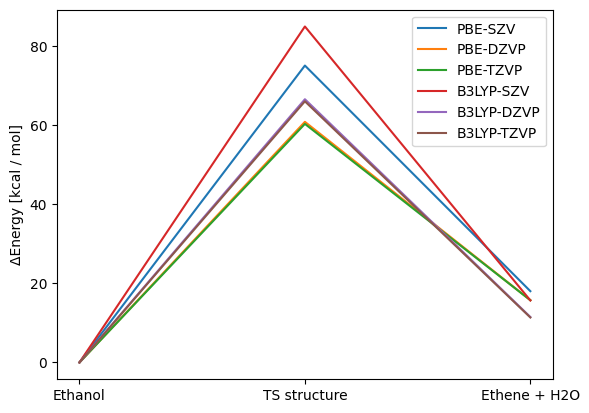

In [26]:
# add ethene and h2o together
energies_final = np.array([es[-1] for es in energies]).reshape((len(molecules), len(methods), len(basis)))
energies_final[2, ...] += energies_final[3, ...]

# convert to eV
energies_final *= Ha_to_kcalmol

x = np.arange(1, 4)
energies
for i, met in enumerate(methods):
    for j, bas in enumerate(basis):
        plt.plot(x, energies_final[:3, i, j] - energies_final[0, i, j], label=f"{met}-{bas}")
plt.xticks(x, ["Ethanol", "TS structure", "Ethene + H2O"])
plt.ylabel("ΔEnergy [kcal / mol]")
plt.legend()
plt.show()

We can see, that using only a single coefficient, is not really accurate. For both methods, (PBE and B3LYP) the basis set with three coefficients converges to the same value as with 2 coefficients, so probably it won't change much with more either. But worth noting is that the two methods converge to different values.

The result looks very much like Fig. 4 in the above paper but the Energy difference between ethanol and the TS structure is lower, 60 kcal$\cdot$mol$^{-1}$ instead of 70 for the gas phase. Note that the figure plots the energy **difference** with respect to ethanol. So we can see, that the reaction from ethanol to ethene + H$_2$O is endothermic.

#### End Assignment 5

#### Assignment 6: Reproduction of the rate constant for the reaction $k(T)$
Thermodynamics defines the temperature-dependent **rate constant** $k(T)$ as

$$k(T)=\frac{k_BT}{2\pi\hbar C}\exp(-\Delta G / RT),$$

where $k_B$ is the Boltzmann constant, $T$ the absolute temperature, $\hbar$ the reduced Planck constant, $C$ the standard concentration of 1 mol $L^{-1}$, $G$ the **Gibbs free energy**, and $R$ the universal gas constant. The **Gibbs free energy** is in turn defined in terms of the **enthalpy** $H=U+pV$ as

$$ G=H-TS, $$

where $U$ is the **internal energy** (which we obtain from our converged calculations), $p$ the pressure, $V$ the volume, and $S$ the entropy. By considering only *differences* in the various energies, we posit
$$\Delta G = \Delta H = \Delta U. $$

The equation for $k(T)$ then becomes
$$ k(T)=\frac{k_BT}{2\pi\hbar C}\exp(-\Delta U / RT), $$

where $\Delta U := U_{\text{final}} - U_{\text{init}}$ is obtained from our calculations. Consistent with the literature (and with the notation in Fig. 2), anything having to do with the **transition state** takes a superscript double-dagger: thus, $U^\ddagger$, $G^\ddagger$, etc. Reproduce the gasphase plot (black squares) of Fig. 6 [the paper](https://pubs.rsc.org/en/content/articlepdf/2016/ra/c6ra08509a) by plotting $\log[k^\ddagger(T)]$ vs. $T$, with

$$k^\ddagger(T)=\frac{k_BT}{2\pi\hbar C}\exp(-\Delta U^\ddagger / RT),$$

and using the identification that $\Delta U^\ddagger=U_{\text{TS}} - U_{\text{ethanol}}$ for about 20 evenly-spaced values of $T$ between 300K and 1300K. Just like in Exercise 5, you'll have six different curves (2 functionals PBE, B3LYP x 3 basis sets SZV, DZVP, TZVP), so you can, depending on how you scale the axes, just superimpose them onto one graph.

In [27]:
from scipy.constants import physical_constants

In [28]:
kb = physical_constants["Boltzmann constant"][0] # same as R
h = physical_constants["Planck constant"][0] # = 2 * pi * hbar

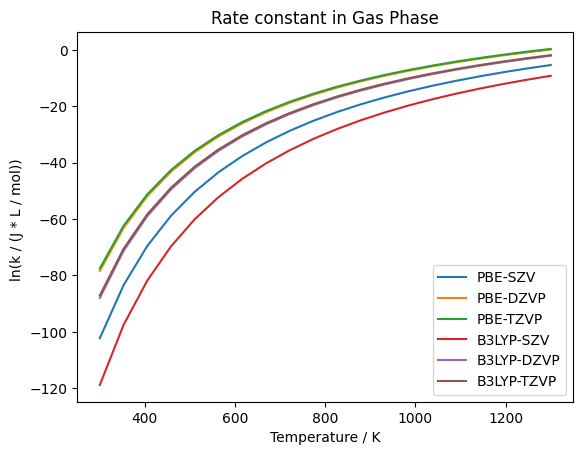

In [29]:
# get differences
energies_final = np.array([es[-1] for es in energies]).reshape((len(molecules), len(methods), len(basis)))
dU = energies_final[1, ...] - energies_final[0, ...]

# convert to J
dU *= Ha_to_J

temp = np.linspace(300, 1300, 20)
kT = kb / h * np.exp(-dU[..., np.newaxis] / (kb * temp))

energies
for i, met in enumerate(methods):
    for j, bas in enumerate(basis):
        plt.plot(temp, np.log(kT[i, j, ...]), label=f"{met}-{bas}")
plt.xlabel("Temperature / K")
plt.ylabel("ln(k / (J * L / mol)) ")
plt.legend()
plt.title("Rate constant in Gas Phase")
plt.show()

Again, the single coefficient bases are not near the other version and within PBE and B3LYP the two and three coefficient bases have almost the same values.

#### End Assignment 6